# Animating Particle Swarm Optimization

In [192]:
import numpy as np

from typing import List, Tuple, Callable

**PSO part**

Function we are trying to optimize - Ackley function, with lots of local minima. Global mininum is at (0, 0), with a value of 0

In [264]:
def ackley_fun(x: List[float]) -> float:
    return -20 * np.exp(-.2*np.sqrt(.5*(x[0]**2 + x[1]**2))) - np.exp(.5*(np.cos(np.pi*2*x[0])+np.cos(np.pi*2*x[1]))) + np.exp(1) + 20

Implementation of PSO algorithm for 2D functions

In [257]:
def pso2D(
    fitness_fun: Callable[[float, float], float], 
    data_range: Tuple[float, float],
    num_particles = 100,
    num_iterations = 50,
    c1 = 0.8,
    c2 = 0.9,
    w = 0.5,
) -> List[List[List[float]]]:
    # Initializing the particles and best scores
    population = np.random.uniform(
        low=data_range[0], high=data_range[1], size=(num_particles, 2))
    velocities = np.zeros((num_particles, 2))
    personal_bests = [np.inf for i in range(num_particles)]
    personal_best_solutions = np.copy(population)
    global_best = np.inf
    best_solution = population[0]
    history = [] # for animation
    
    for i in range(num_iterations):
        history.append(np.copy(population))
        # update personal bests
        for j in range(num_particles):
            if personal_bests[j] > fitness_fun(population[j]):
                personal_bests[j] = fitness_fun(population[j])
                personal_best_solutions[j] = population[j]
        # update global best
        if min(personal_bests) < global_best:
            global_best, best_solution = \
            min(personal_bests), personal_best_solutions[np.argmin(personal_bests)]        
    
        print(f'{i}, best fitness so far: {global_best},',
            f'solution: {best_solution}')    
        #update velocities and positions
        for i, (particle, v) in enumerate(zip(population, velocities)):
            v = w*v + c1*np.random.rand()*(personal_best_solutions[i] - particle) + \
                        c2*np.random.rand()*(best_solution - particle)
            velocities[i] = v
            population[i] = particle + v
        
    return history

In [269]:
history = pso2D(ackley_fun, (-5, 5), num_particles=150, num_iterations=30)

0, best fitness so far: 3.509630273547554, solution: [ 0.98236196 -0.21063741]
1, best fitness so far: 1.3884579006889162, solution: [0.05970446 0.19352077]
2, best fitness so far: 0.3517200390051123, solution: [ 0.02352632 -0.07057491]
3, best fitness so far: 0.27532947707299016, solution: [0.06174628 0.00687219]
4, best fitness so far: 0.10188890400435824, solution: [ 0.02449972 -0.01445745]
5, best fitness so far: 0.05162645822390388, solution: [-0.00097413  0.01585282]
6, best fitness so far: 0.011396039074387687, solution: [0.00360841 0.00144475]
7, best fitness so far: 0.011396039074387687, solution: [0.00360841 0.00144475]
8, best fitness so far: 0.011396039074387687, solution: [0.00360841 0.00144475]
9, best fitness so far: 0.011396039074387687, solution: [0.00360841 0.00144475]
10, best fitness so far: 0.00854178012169271, solution: [0.00251477 0.00152045]
11, best fitness so far: 0.006534902772138196, solution: [0.00217441 0.00062431]
12, best fitness so far: 0.00272120393492

**Animating the particle movement**

In [260]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation

In [270]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = np.array([ackley_fun([x, y]) for x, y in zip(X, Y)])

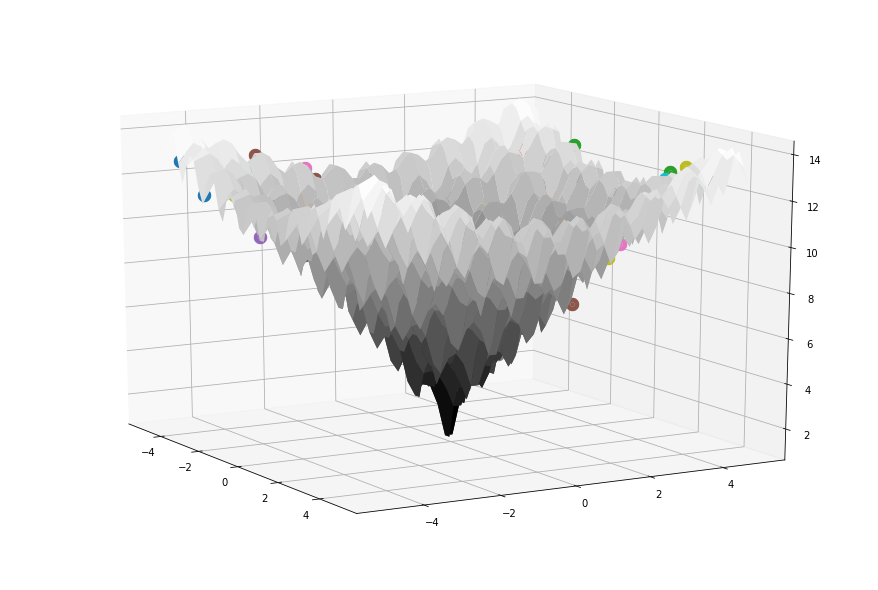

In [280]:
fig = plt.figure(figsize=(12, 8))
ax = mplot3d.axes3d.Axes3D(fig)
# plot the function
ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                cmap='gray', edgecolor='none')
# initialize particles (1:2 because scatter expects object with length)
data = history[0]
scatters = [
    ax.scatter(data[i, 0:1], data[i, 1:2], data[i, 2:], linewidth=9) 
    for i in range(len(data))]

# Animation callback function
def animate(iteration, history, scatters):
    data = history[iteration]
    for i in range(len(data)):
        scatters[i]._offsets3d = (data[i, 0:1], data[i, 1:2], [ackley_fun(data[i])])
    return scatters

# Initial angle
ax.view_init(15, -30)

ani = animation.FuncAnimation(fig, animate, fargs=(history, scatters),
                frames=len(history), interval=250, repeat=True, blit=False)

plt.show()

In [281]:
plt.rcParams['animation.ffmpeg_path'] = u'/usr/bin/ffmpeg'
plt.rcParams['animation.html'] = 'html5'
ani

Save the animation as mp4

In [283]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, bitrate=1800, extra_args=['-vcodec', 'libx264'])
ani.save('pso-animation.mp4', writer=writer)